# Whitney Hardy 
## Task 4.10 Coding Etiquette & Excel Reporting

#### Import Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### Import Data

In [2]:
#create a path 
path = r'C:\Users\hardy\10-2025 Instacart Basket Analysis'

In [3]:
#test path
path

'C:\\Users\\hardy\\10-2025 Instacart Basket Analysis'

In [4]:
#importing final dataframe
df_final = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'merging_exercise_4_9.pkl')) 

In [5]:
#check data output
df_final.shape

(32399732, 34)

In [6]:
#check data output using head function
df_final.head() 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,ord_regularity_median,frequency_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,merging status
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


#### PII Data check
In a previous step, I deleted first_name and last_name information from dataframe to keep information anonymous. I am going to double check all columns are relevant and follow PII guidelines.

In [7]:
#listing all column names 
df_final.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices', 'Match',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spend_user',
       'spending_flag', 'ord_regularity_median', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'number_of_dependents', 'marital_status',
       'income', 'merging status'],
      dtype='object')

#### Cleaning up columns 
Although I have no personal data to drop. I am going to take this time to clean up my columns so my dataframe is clean and organized.

In [8]:
#remove columns that are not needed
df_final = df_final.drop(['_merge', 'busiest_day'], axis=1) 

In [9]:
#check output 
df_final.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'Match', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spend_user', 'spending_flag', 'ord_regularity_median',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income', 'merging status'],
      dtype='object')

#### Comparing Regions

In [10]:
#create region column based on state column
#northeast
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']  

In [11]:
#midwest
midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'] 

In [12]:
#south
south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']  

In [13]:
#West
west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']

In [14]:
#Assign states to region
def region(state):
    if state in northeast:
        return "Northeast"
    elif state in midwest:
        return "Midwest"
    elif state in south:
        return "South"
    elif state in west:
        return "West"
    else:
        return "Unknown" 

In [15]:
#create region column
df_final['region'] = df_final['state'].apply(region) 

In [16]:
#check output 
df_final['region'].value_counts() 

region
South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: count, dtype: int64

In [17]:
#check output
df_final.head() 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,merging status,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [18]:
#check the spending habits across different regions using crosstab
pd.crosstab(df_final["region"], df_final["spending_flag"], dropna=False) 

spending_flag,High spender,Low spender
region,,
Midwest,29265,7566800
Northeast,18639,5703253
South,40577,10749519
West,31238,8260441


In [19]:
#create crosstab to copy to excel
crosstab = pd.crosstab(df_final["region"], df_final["spending_flag"], dropna=False) 

In [20]:
#copy crosstab to excel
crosstab.to_clipboard() 

#### Low-activity spenders
Create a low-activity spender flag, customers with less than 5 orders will be removed from data per CFO 

In [21]:
#create new exclusion flag column based on max_order 
df_final.loc[df_final['max_order'] < 5, 'customer_activity'] = 'low'
df_final.loc[df_final['max_order'] >= 5, 'customer_activity'] = 'high'  

In [22]:
#check output
df_final['customer_activity'].value_counts(dropna = False) 

customer_activity
high    30959687
low      1440045
Name: count, dtype: int64

In [23]:
#create a subset of low activity spenders 
df_low_activity_custs = df_final[df_final['customer_activity']== 'low'] 

In [24]:
#check subset
df_low_activity_custs.head() 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,number_of_dependents,marital_status,income,merging status,region,customer_activity
360,2717275,5,1,3,12,NaN,True,15349,1,0,...,Female,California,75,10/8/2018,0,divorced/widowed,115242,both,West,low
361,2717275,5,1,3,12,NaN,True,21413,2,0,...,Female,California,75,10/8/2018,0,divorced/widowed,115242,both,West,low
362,2717275,5,1,3,12,NaN,True,48775,3,0,...,Female,California,75,10/8/2018,0,divorced/widowed,115242,both,West,low
363,2717275,5,1,3,12,NaN,True,28289,4,0,...,Female,California,75,10/8/2018,0,divorced/widowed,115242,both,West,low
364,2717275,5,1,3,12,NaN,True,8518,5,0,...,Female,California,75,10/8/2018,0,divorced/widowed,115242,both,West,low


In [25]:
#check subset shape
df_low_activity_custs.shape

(1440045, 34)

In [26]:
#check max_orders of low activity cust subset
df_low_activity_custs['max_order']  

360         4
361         4
362         4
363         4
364         4
           ..
32398413    3
32398414    3
32398415    3
32398416    3
32398417    3
Name: max_order, Length: 1440045, dtype: int64

I created a subset of the low activity customers and I plan to export data frame before deleting from df_final dataframe. I do not want to delete the data outright, in case it is needed again. 

In [27]:
#export df_low_activity_custs
df_low_activity_custs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl')) 

In [28]:
#exlube the low activity customers from df- first check shape of df
df_final.shape

(32399732, 34)

In [29]:
df_final_1 = df_final[df_final['customer_activity']== 'high'] 

In [30]:
#check data output
df_final_1.shape

(30959687, 34)

In [31]:
#check output using head function
df_final_1.head() 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,number_of_dependents,marital_status,income,merging status,region,customer_activity
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high


In [32]:
#check max_order colum
df_final_1['max_order'] 

0           10
1           10
2           10
3           10
4           10
            ..
32399727    13
32399728    13
32399729    13
32399730    13
32399731    13
Name: max_order, Length: 30959687, dtype: int64

#### Customer Profiling 

In [33]:
# First create the conditions and corresponding values
conditions = [
    # Young Adult, No Kids
    ((df_final_1['number_of_dependents'] == 0) & (df_final_1['age'] >= 18) & (df_final_1['age'] <= 40)),
    # Older Adult, No Kids
    ((df_final_1['number_of_dependents'] == 0) & (df_final_1['age'] >= 41) & (df_final_1['age'] <= 82)),
    # Parent, Low/Med Income
    ((df_final_1['number_of_dependents'] >= 2) & (df_final_1['income'] <= 120000)),
    # Parent, High Income
    ((df_final_1['number_of_dependents'] >= 2) & (df_final_1['income'] > 120000))
]

choices = [
    'Young Adult, No Kids',
    'Older Adult, No Kids',
    'Parent, Low/Med Income',
    'Parent, High Income'
]

# Use numpy.select for memory efficiency
import numpy as np
df_final_1['profile_segment'] = np.select(conditions, choices, default='Other')

# Quick check 
df_final_1['profile_segment'].value_counts(dropna=False)

C:\Users\hardy\AppData\Local\Temp\ipykernel_26368\3605335941.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_1['profile_segment'] = np.select(conditions, choices, default='Other')


profile_segment
Parent, Low/Med Income    10913685
Other                      7717946
Older Adult, No Kids       4958642
Parent, High Income        4589548
Young Adult, No Kids       2779866
Name: count, dtype: int64

#### Make visualizations 

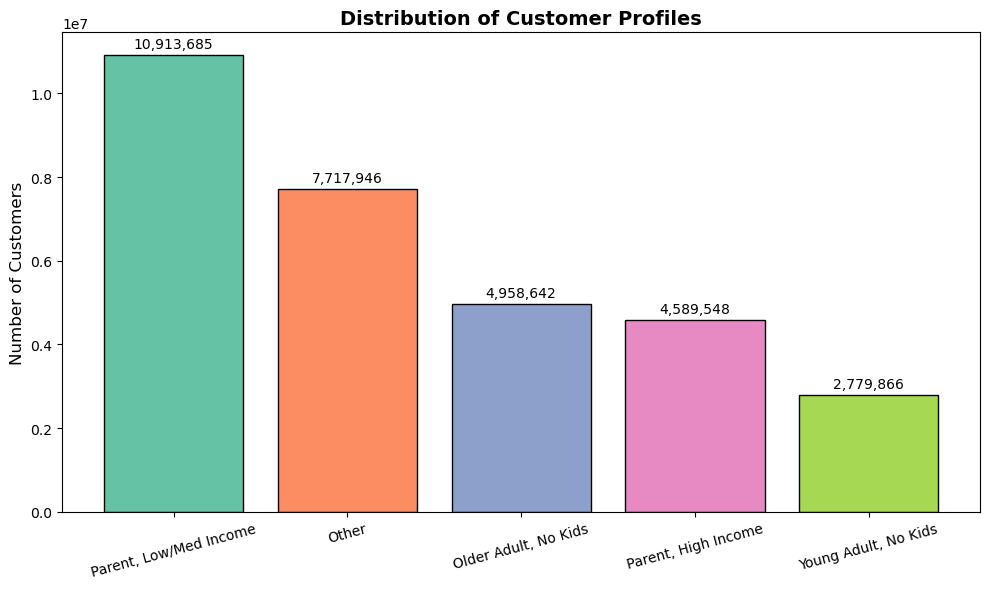

In [34]:
#make visualization for customer profiles 
import matplotlib.pyplot as plt

# Set color palette (4.9 style)
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

# Prepare data
profile_counts = df_final_1['profile_segment'].value_counts(dropna=False)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(profile_counts.index, profile_counts.values, color=colors, edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100000, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=10)

# Styling
plt.title('Distribution of Customer Profiles', fontsize=14, weight='bold')
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()

# Save figure
plt.savefig(r'C:\Users\hardy\10-2025 Instacart Basket Analysis\04 Analysis\Visualizations\profile_segment_bar.png')
plt.show() 

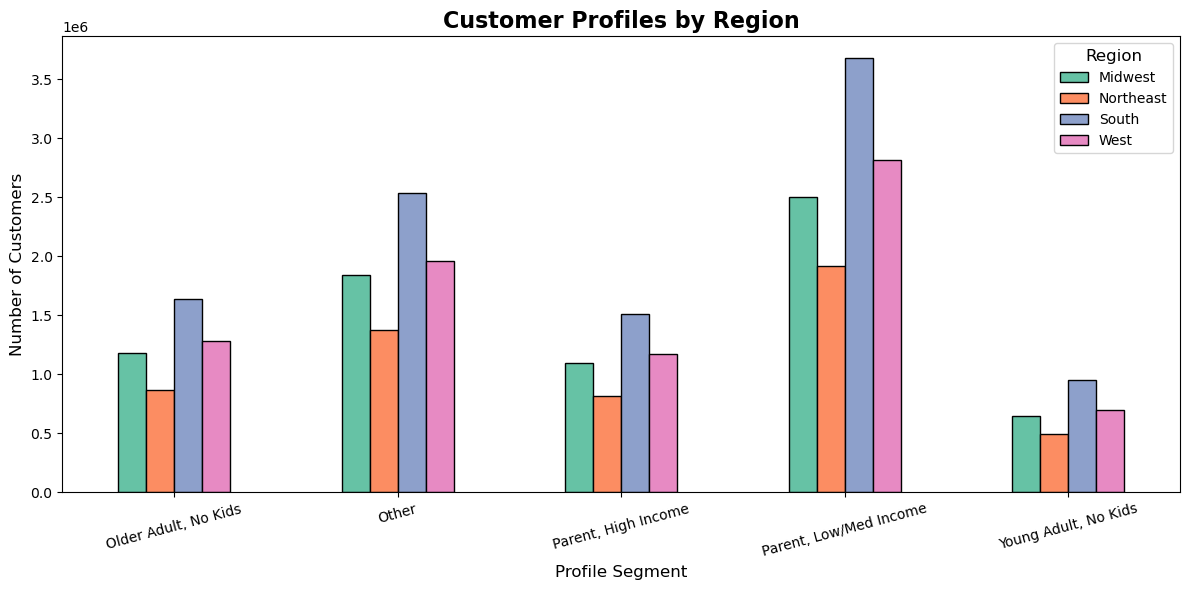

In [49]:
#create visualization to display customer by region information 
import pandas as pd
import matplotlib.pyplot as plt

# Cross-tab for profile vs region
cross_region = pd.crosstab(df_final_1['profile_segment'], df_final_1['region'])

# Plot with enhancements
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
ax = cross_region.plot(kind='bar', figsize=(12, 6), color=colors, edgecolor='black')

# Title and axis labels
plt.title('Customer Profiles by Region', fontsize=16, fontweight='bold')
plt.xlabel('Profile Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.yticks(fontsize=10)

# Legend formatting
plt.legend(title='Region', title_fontsize=12, fontsize=10, loc='upper right')

# Layout and save
plt.tight_layout()
plt.savefig(r'C:\Users\hardy\10-2025 Instacart Basket Analysis\04 Analysis\Visualizations\profile_by_region_labeled.png') 
plt.show() 

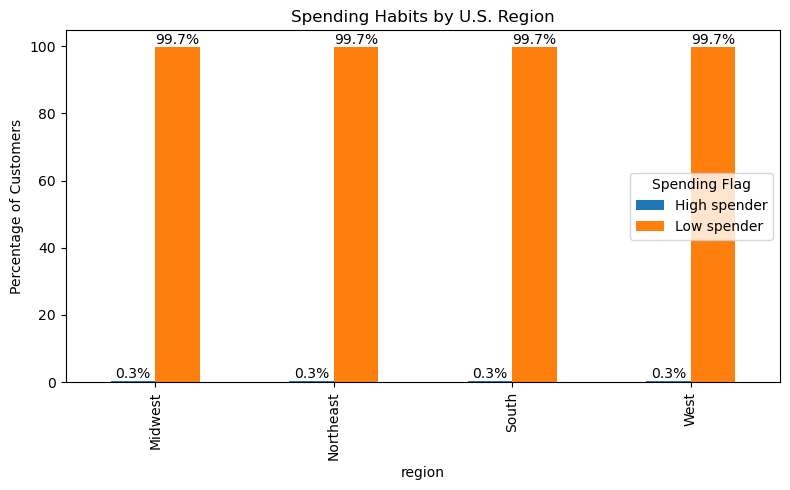

In [36]:
#regional spending 
# Create crosstab with normalized values
spending_by_region = pd.crosstab(df_final_1["region"], df_final_1["spending_flag"], normalize="index") * 100

# Create the bar plot
ax = spending_by_region.plot(kind="bar", stacked=False, figsize=(8,5))

# Add labels and title
plt.ylabel("Percentage of Customers")
plt.title("Spending Habits by U.S. Region")
plt.legend(title="Spending Flag")

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge")

# Save the figure
plt.tight_layout()
plt.savefig(r"C:\Users\hardy\10-2025 Instacart Basket Analysis\04 Analysis\Visualizations\spending_by_region.png", 
            dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

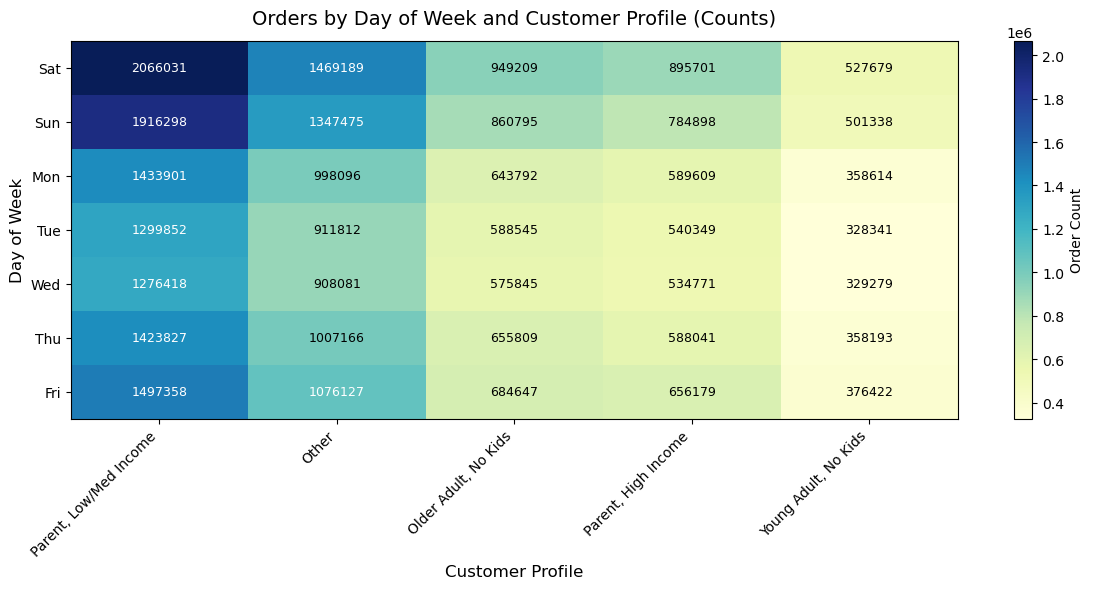

In [38]:
#heat map of days of the week based on customer profiles 
# Create crosstab
dow_profile_ct = pd.crosstab(df_final_1["orders_day_of_week"], df_final_1["profile_segment"]) 

# Sort and reorder
profile_order = dow_profile_ct.sum(axis=0).sort_values(ascending=False).index.tolist()
dow_profile_ct = dow_profile_ct[profile_order]

# Day labels mapping
day_labels_map = {0: "Sat", 1: "Sun", 2: "Mon", 3: "Tue", 4: "Wed", 5: "Thu", 6: "Fri"}
y_ticks = list(dow_profile_ct.index)
y_ticklabels = [day_labels_map.get(int(v), str(v)) for v in y_ticks]

# Create figure and heatmap
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(dow_profile_ct.values, aspect="auto", cmap="YlGnBu")

# Set titles and labels
ax.set_title("Orders by Day of Week and Customer Profile (Counts)", fontsize=14, pad=12)
ax.set_xlabel("Customer Profile", fontsize=12)
ax.set_ylabel("Day of Week", fontsize=12)

# Set x-axis ticks and labels
ax.set_xticks(np.arange(dow_profile_ct.shape[1]))
ax.set_xticklabels(dow_profile_ct.columns, rotation=45, ha="right")

# Set y-axis ticks and labels
ax.set_yticks(np.arange(dow_profile_ct.shape[0]))
ax.set_yticklabels(y_ticklabels)

# Add text annotations with conditional coloring
vals = dow_profile_ct.values
threshold = vals.max() / 2

for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        color = "white" if vals[i, j] > threshold else "black"
        ax.text(j, i, f"{int(vals[i, j])}", ha="center", va="center", color=color, fontsize=9)

# Add colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Order Count", rotation=90)

# Finalize and save
plt.tight_layout()
plt.savefig(r"C:\Users\hardy\10-2025 Instacart Basket Analysis\04 Analysis\Visualizations\orders_by_dow_profile.png", 
            dpi=300, bbox_inches='tight')
plt.show() 

#### Popular Department 

C:\Users\hardy\AppData\Local\Temp\ipykernel_26368\4101702848.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_1["department_name"] = df_final_1["department_id"].map(dept_map)


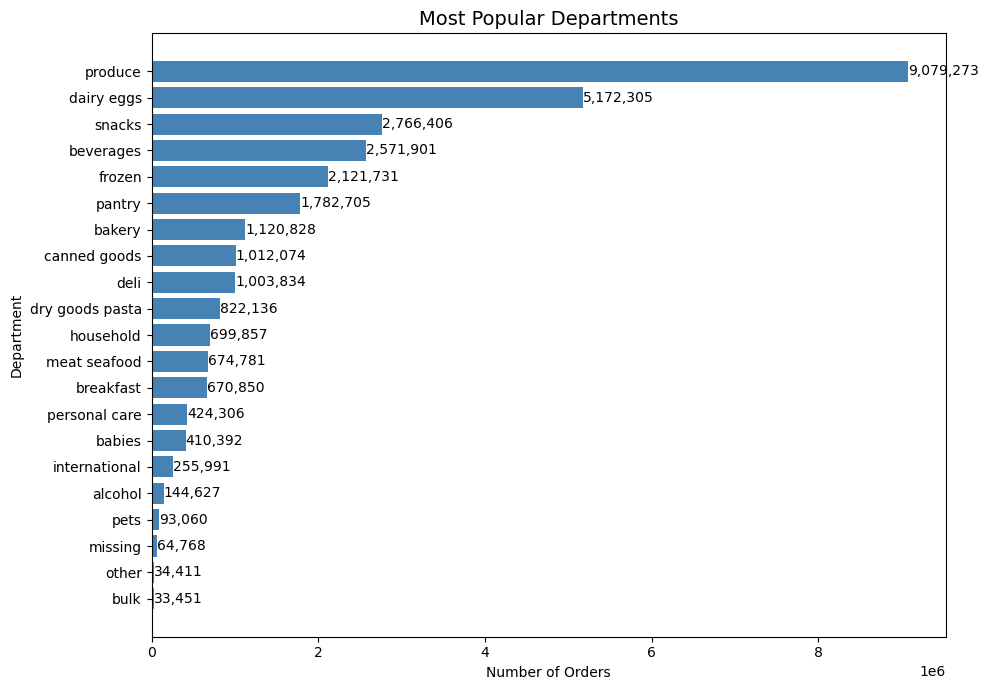

Department popularity chart saved successfully!


In [39]:
#most popular department
import pandas as pd
import matplotlib.pyplot as plt

# Department mapping dictionary
dept_map = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
    21: "missing"
}

# Map department_id to department_name
df_final_1["department_name"] = df_final_1["department_id"].map(dept_map)

# Get value counts and sort
dept_counts = df_final_1["department_name"].value_counts().sort_values(ascending=True)

# Create figure and horizontal bar chart
ax = plt.figure(figsize=(10, 7))
bars = plt.barh(dept_counts.index, dept_counts.values, color="steelblue")

# Add value labels on bars
for bar in bars:
    plt.text(bar.get_width() + 500,
             bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width()):,}",
             va="center")

# Add labels and title
plt.title("Most Popular Departments", fontsize=14)
plt.xlabel("Number of Orders")
plt.ylabel("Department")

# Finalize and save
plt.tight_layout()
plt.savefig(r"C:\Users\hardy\10-2025 Instacart Basket Analysis\04 Analysis\Visualizations\popular_departments.png", 
            dpi=300, bbox_inches='tight')
plt.show()

print("Department popularity chart saved successfully!") 

C:\Users\hardy\AppData\Local\Temp\ipykernel_26368\3483531625.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_1["department_name"] = df_final_1["department_id"].map(dept_map)


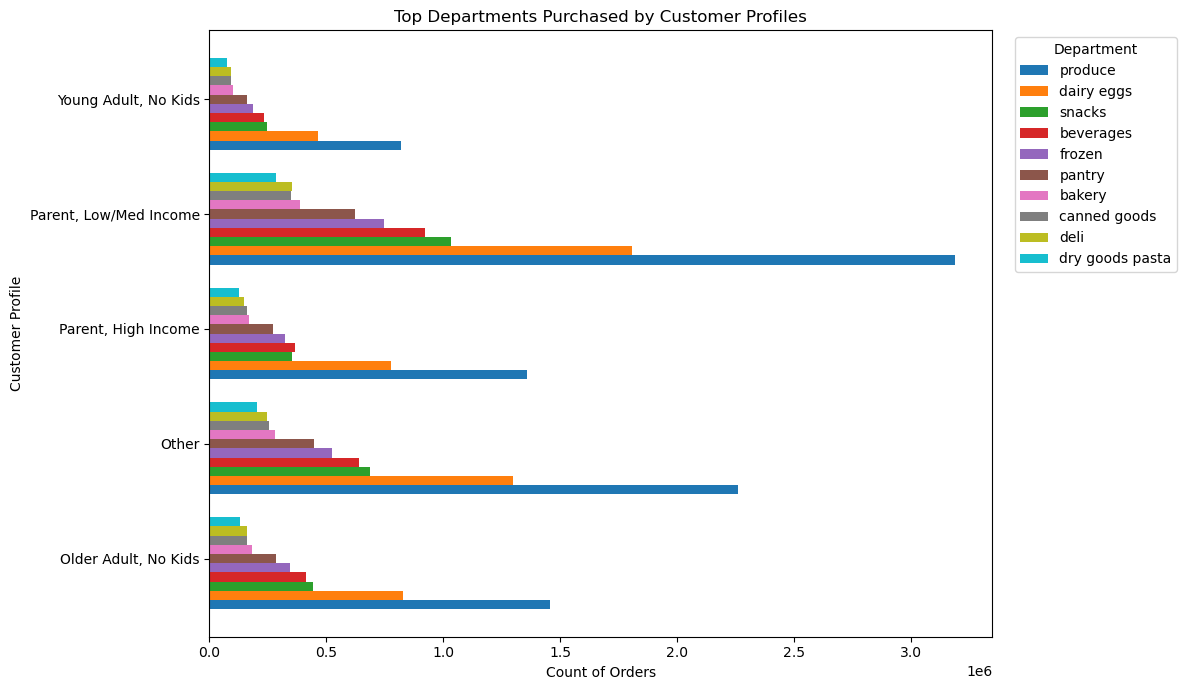

Top departments by profile chart saved successfully!


In [41]:
# make bar chart comparing most popular dept by cust profile
# 1) Map department_id to department_name
dept_map = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
    21: "missing"
}

df_final_1["department_name"] = df_final_1["department_id"].map(dept_map)

# 2) Create Profile x Department COUNT matrix
mat = (df_final_1
       .groupby(["profile_segment", "department_name"])
       .size()
       .unstack(fill_value=0))

# 3) Select top K most popular departments
TOP_K = 10
top_depts = mat.sum(axis=0).sort_values(ascending=False).head(TOP_K).index
mat = mat[top_depts]

# 4) Create horizontal bar chart
profiles = mat.index.tolist()
depts = mat.columns.tolist()

n_profiles = len(profiles)
n_depts = len(depts)

bar_h = 0.8 / n_depts
y_base = np.arange(n_profiles)

ax = plt.figure(figsize=(12, 7))

for i, dept in enumerate(depts):
    y_pos = y_base - 0.4 + i*bar_h
    plt.barh(y_pos, mat[dept].values, height=bar_h, label=dept)

plt.yticks(y_base, profiles)
plt.xlabel("Count of Orders")
plt.ylabel("Customer Profile")
plt.title("Top Departments Purchased by Customer Profiles")
plt.legend(title="Department", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.savefig(r"C:\Users\hardy\10-2025 Instacart Basket Analysis\04 Analysis\Visualizations\top_depts_by_profile.png", 
            dpi=300, bbox_inches='tight')
plt.show()

print("Top departments by profile chart saved successfully!")